## Imports 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)
pd.set_option("display.width",1000)

## Reading Data

In [4]:
data = pd.read_csv("application_data.csv")

### Inspecting Data 

In [5]:
data.shape

(307511, 122)

In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#Percentage of nullvaues in dataset

(data.isna().mean()*100).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

## Data Cleaning

### Inspecting Null Values

In [8]:
data.columns[(data.isna().mean()*100).round(2) > 50]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'], dtype='object')

In [9]:
# Getting rid of the columns with mean null values more than 50% 

data = data.loc[:,(data.isna().mean()*100).round(2) < 50]

In [10]:
# Percentage of Null Values in remaining columns 

(data.isna().mean()*100).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

### Making Necessary Imputes

In [11]:
# Imputing null values with appropriate method 

data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(0.0)

In [12]:
data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']] = data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].fillna(0.0)

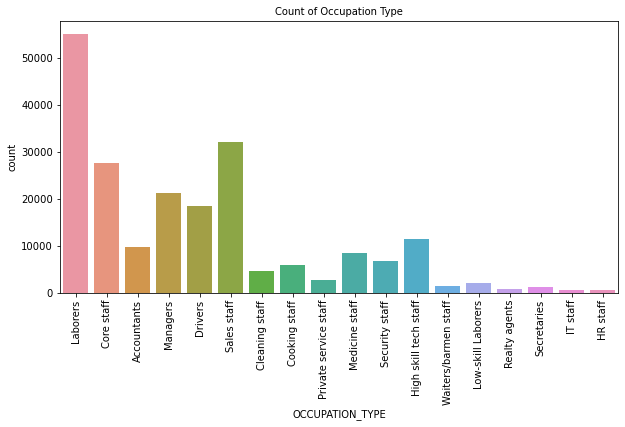

In [13]:
# plotting count of occupation type

plt.figure(figsize=(10,5))
sns.countplot(x = 'OCCUPATION_TYPE', data=data)
plt.title("Count of Occupation Type",size=10)
plt.xticks(rotation = 90);

Insights: Majority of people who applied for loan are laborers. Therefore we cannot designate missing value of other occupations like IT staff or HR staff with laborers. Hence we should not treat missing values of this particular column.

In [14]:
# Data is Clean 

## Snaity Checks

In [15]:
# checking unique values 

data.nunique().sort_values(ascending = False)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
TOTALAREA_MODE                    5116
DAYS_LAST_PHONE_CHANGE            3773
AMT_INCOME_TOTAL                  2548
AMT_GOODS_PRICE                   1002
EXT_SOURCE_3                       814
FLOORSMAX_AVG                      403
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BEGINEXPLUATATION_MEDI       245
YEARS_BEGINEXPLUATATION_MODE       221
REGION_POPULATION_RELATIVE          81
ORGANIZATION_TYPE                   58
FLOORSMAX_MEDI                      49
OBS_30_CNT_SOCIAL_CIRCLE            33
OBS_60_CNT_SOCIAL_CIRCLE            33
FLOORSMAX_MODE                      25
AMT_REQ_CREDIT_BUREAU_YEAR          25
AMT_REQ_CREDIT_BUREAU_MON           24
HOUR_APPR_PROCESS_START  

In [16]:
#changing negative ages to positive ages.

data['DAYS_BIRTH']=abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [17]:
#changing negative values in days to positive days

data['DAYS_EMPLOYED']=abs(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [18]:
#changing negative days to positive days.

data['DAYS_REGISTRATION']=abs(data['DAYS_REGISTRATION'])
data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [19]:
#changing negative days to positive 

data['DAYS_ID_PUBLISH']=abs(data['DAYS_ID_PUBLISH'])
data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [20]:
#converting the data type of categorical column
data['REG_REGION_NOT_LIVE_REGION'] = data['REG_REGION_NOT_LIVE_REGION'].astype(object)

In [21]:
#Changing region from int to object
data['REG_REGION_NOT_WORK_REGION'] = data['REG_REGION_NOT_WORK_REGION'].astype(object)

In [22]:
#Changing region from int to object
data['LIVE_REGION_NOT_WORK_REGION'] = data['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [23]:
#Changing city from int to object
data['REG_CITY_NOT_LIVE_CITY'] = data['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [24]:
#Changing city from int to object
data['REG_CITY_NOT_WORK_CITY'] = data['REG_CITY_NOT_WORK_CITY'].astype(object)

In [25]:
#Changing city from int to object
data['LIVE_CITY_NOT_WORK_CITY']=data['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## Dealing with outliers 

### Detecting Outliers 

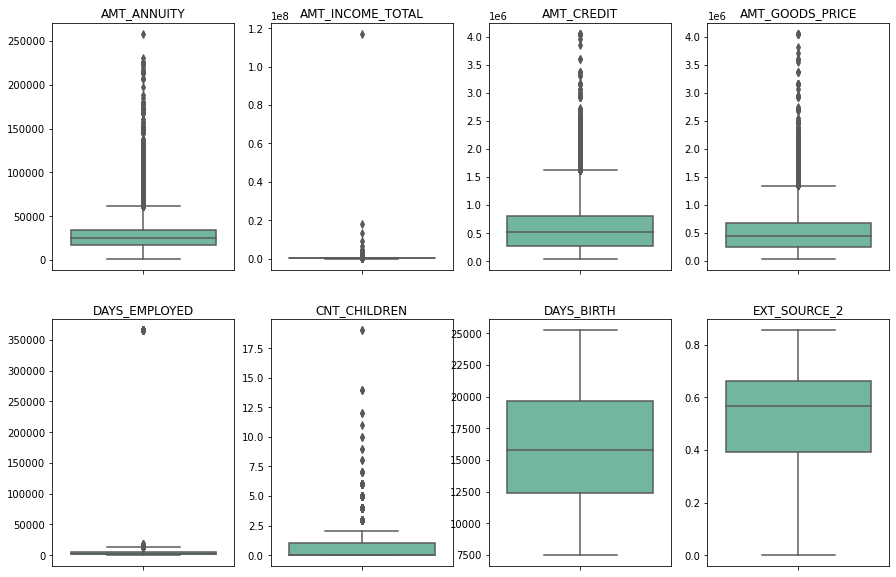

In [27]:
plt.figure(figsize=[15,10])

outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH','EXT_SOURCE_2']

for i in enumerate(outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=data[i[1]] , palette="Set2")
    plt.title(i[1])
    plt.ylabel("")
    
for i in enumerate(outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=data[i[1]] , palette="Set2")
    plt.title(i[1])
    plt.ylabel("")
    

We can observe outliers in AMT_ANUITY , AMT_INCOME , and AMT_CREDIT that means some customers have high income and high credit score comparatively . These columns don't need to be imputed or deleted as these people can be potential customers . 

We can also observe that DAYS_EMPLOYED column has heavy outliers and they need to deleted as these numbers are not practical and data will become non reliable .  

DAYS_BIRTH do not have any outliers hence data is reliable. 

### Handeling Outliers 

In [28]:
# Handeling Outiers from Days Employed column 

data.DAYS_EMPLOYED=data[data.DAYS_EMPLOYED<np.nanpercentile(data['DAYS_EMPLOYED'], 99)]

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

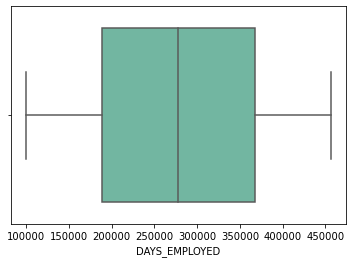

In [29]:
sns.boxplot(data.DAYS_EMPLOYED , palette="Set2")

## Binning Columns 

In [30]:
data.AMT_CREDIT.describe()         

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

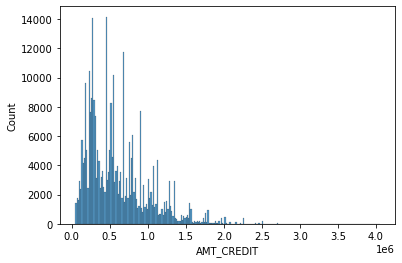

<Figure size 720x864 with 0 Axes>

In [31]:
sns.histplot(data.AMT_CREDIT , palette="Set2")         # This is a continous variable 

plt.figure(figsize=[10,12])

plt.show()

In [32]:
# Creating Bins for credit amount AMT_CREDIT

data["CREDIT_RANGE"] = pd.cut(data["AMT_CREDIT"] , bins = [0,350000,700000,1000000000] , labels = ["Low" , "Medium" , "High"])

In [33]:
data.CREDIT_RANGE.value_counts()

Low       107162
Medium    100452
High       99897
Name: CREDIT_RANGE, dtype: int64

In [34]:
data.AMT_INCOME_TOTAL.describe()   # Credit Range needs to be binned 

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
data["INCOME_RANGE"] = pd.cut(data["AMT_INCOME_TOTAL"] , bins = [0,200000,400000,10000000000] , labels = ["Low" , "Medium" , "High"])

In [36]:
data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [37]:
data["AGE_RANGE"] = pd.cut(data["DAYS_BIRTH"] , bins = [0,7300,10950,14600,18250,21900,25500] , labels = ['0-20','20-30','30-40','40-50','50-60','60-70'])

In [38]:
# Done with Binning 

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,100002,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,100003,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,100004,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,100006,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,100007,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60


## Analysis 

### Checking Imbalance 

In [39]:
((data.TARGET.value_counts()/len(data))*100)        # Precentage Value Count 

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

1) 91% Customers dont have any payment difficulty 
2) 8% Customers have payment difficulties 

In [40]:
# dividing the database into 2 categories , one with payment difficulties and one with no payment difficulty

In [41]:
target_1 = data[data.TARGET == 1]   # Difficulty with payment 

target_0 = data[data.TARGET == 0]   # No Difficulty with payment 

##  Univariate Analysis of Target Columns  

### Numeric variable analysis

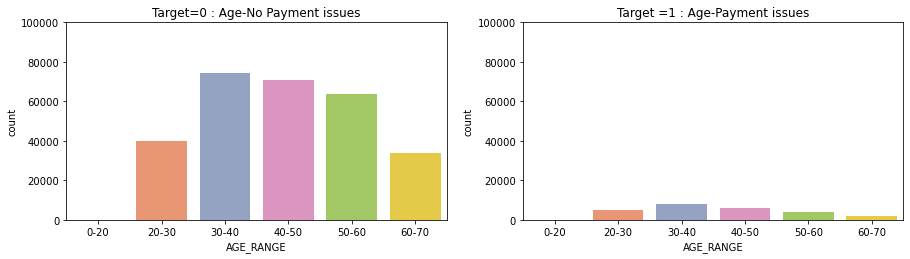

In [42]:

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'] , palette="Set2")

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'] , palette="Set2")
plt.show()

1) Millennials of age 0-20 are not and should not be approved for loan as they lack education and employement

2) Age Group 30-40 should be strongly considered for lending loas as they tend to pay back , followed by 40-50 and 50-60 

### Target vs Flag Own Realty

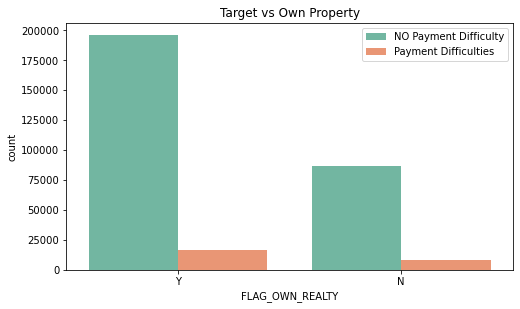

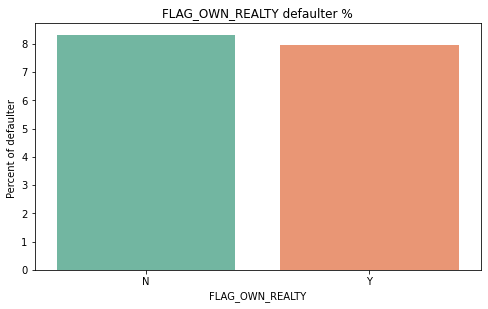

In [43]:
plt.figure(figsize=[8,10])
plt.subplot(2,1,1)
sns.countplot(x = "FLAG_OWN_REALTY" , data = data , hue = "TARGET" , palette="Set2")
plt.legend(["NO Payment Difficulty" , "Payment Difficulties"])
plt.title("Target vs Own Property")
plt.show()

plt.figure(figsize=[8,10])
plt.subplot(2,1,2)
plot_data=data[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='FLAG_OWN_REALTY',y='TARGET',data=plot_data , palette="Set2")
plt.title('FLAG_OWN_REALTY defaulter %')
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Percent of defaulter ')
plt.show()



People with own property are almost double then the people who don't own property but the rate of default is very close . Hence Owning own property doesn't guarantee payback , in-fact Owing realty and payback of loan are not related. 

### Target Vs Credit Range

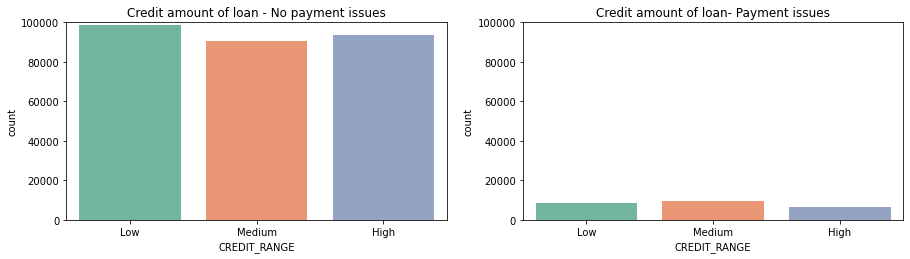

In [44]:

# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['CREDIT_RANGE'] , palette="Set2" )

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['CREDIT_RANGE'] , palette="Set2")
plt.show()

1) People with low Credit range tend to pay back and have less payment issues . 

2) People with High and Medium credit range are also upto the mark and can surely be considered for issuing loan.

### Target vs FLAG_OWN_CAR

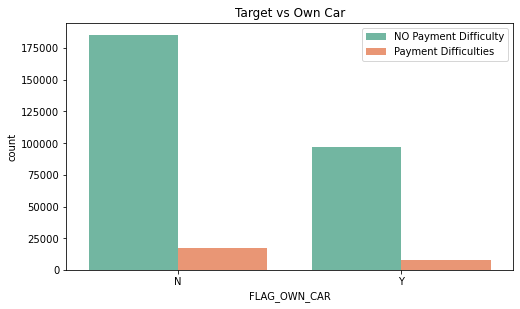

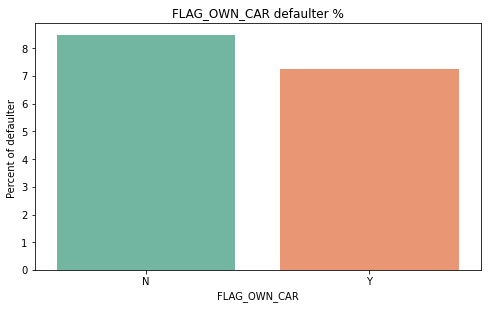

In [45]:
plt.figure(figsize=[8,10])
plt.subplot(2,1,1)
sns.countplot(x = "FLAG_OWN_CAR" , data = data , hue = "TARGET" , palette="Set2")
plt.legend(["NO Payment Difficulty" , "Payment Difficulties"])
plt.title("Target vs Own Car")
plt.show()

plt.figure(figsize=[8,10])
plt.subplot(2,1,2)
plot_data=data[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='FLAG_OWN_CAR',y='TARGET',data=plot_data , palette="Set2")
plt.title('FLAG_OWN_CAR defaulter %')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Percent of defaulter ')
plt.show()

The number of people who dont have a car is almost double the number of people who own a car . It can be seen that mostly customers who own a car have more chance to payback the loan , and Customers who dont own car have little high chance of defaulting . This factor should be taken into consideration by banks 

### Categorical variable analysis - Target vs Occupation Type

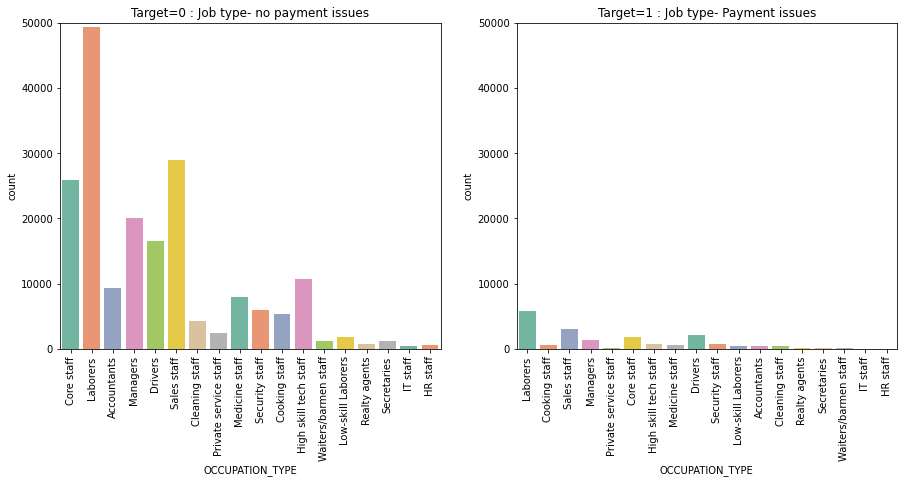

In [46]:

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'] , palette="Set2")
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'] , palette="Set2")
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()


From above analysis we can conclude that Labourers tend to payback the loan on time , while IT Staff mostly likely to don't pay back the loan on time.

### Categorical variable analysis - Target vs Income Type

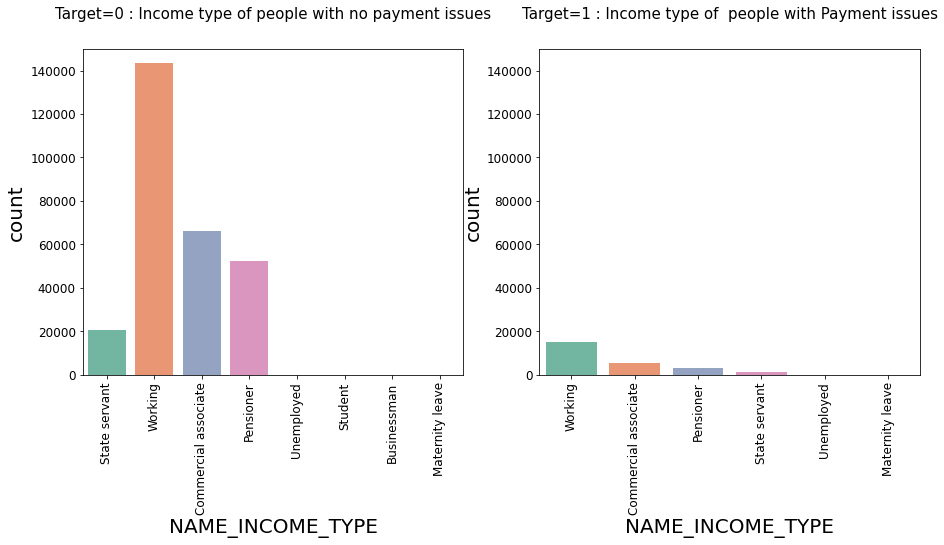

In [47]:

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna() , palette="Set2")
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna() , palette="Set2")
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()


Plot shows that working class of people have very high percentage of paying back the loan.

### Analysing Categorical variables with respect to Target variable

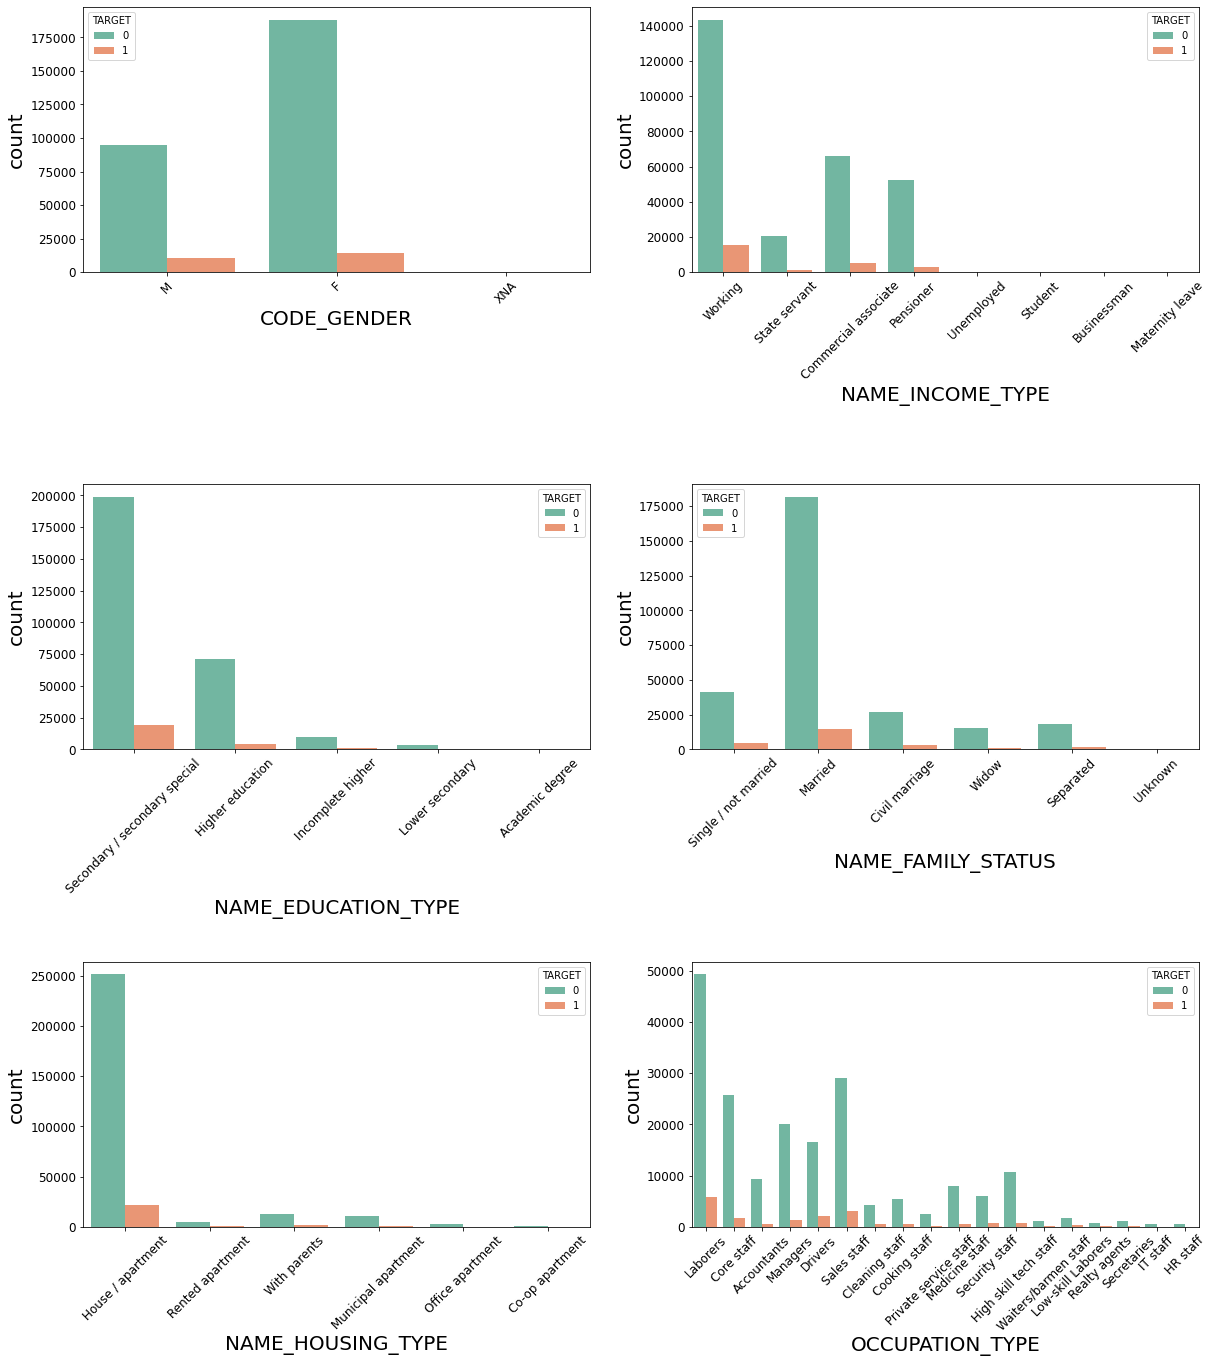

In [48]:

features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = data , palette="Set2")
    plt.xticks(rotation = 45)

Upon obesrving following plots it is evidant that femails have high chance of paying back the loan compared to males . Hence gender can be considered while approving or rejecting the loan application 

Working peole should be given priority 

people with completed secondary education or Higher Education tend to pay back the loan 

Married Couples are the once who apply for the loan the most and they dont tend to have payment difficulties hence they should be considered 

People with their own House/Apartment tend to pay back compared to Co-op Apartment 

Labourers can surely be granted small loans as they have good payback track  (Explained in upcoming analysis)

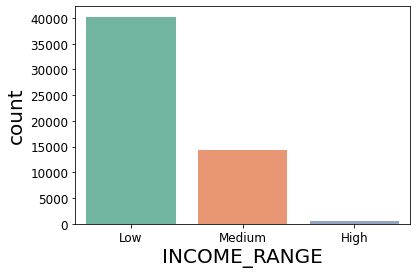

In [49]:
sns.countplot(data.INCOME_RANGE[data.OCCUPATION_TYPE == "Laborers"] , palette="Set2")    # Income Range of Laborers

plt.show()

As Most of Laborers are at low income range . It is more feasible to give them small Loans . As they have good payback trend they can be considered for small loans  

## Corelation Matrix

In [50]:
#correlation matrix for all numerical columns

corr=target_0.corr()
corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000697,0.000553,-0.000743,0.002375,-0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001774,-0.001626,0.002298,-0.000037,0.000963,0.003517
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014532,-0.002193,0.014199,-0.002125,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.030513
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.028647,-0.027998,-0.028507,-0.027897,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.002707,0.008029,0.008647,0.058682,0.017676,0.042522
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000199,-0.019433,-0.000180,-0.021859,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.027599


To get rid of the repeated correlation values between two variables we perform the following steps

In [51]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution

corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000697,0.000553,-0.000743,0.002375,-0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001774,-0.001626,0.002298,-0.000037,0.000963,0.003517
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014532,-0.002193,0.014199,-0.002125,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.030513
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.028647,-0.027998,-0.028507,-0.027897,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.002707,0.008029,0.008647,0.058682,0.017676,0.042522
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000199,-0.019433,-0.000180,-0.021859,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.027599


In [52]:
#converting it to dataframe

corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [53]:
#Changing the names of columns

corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [54]:
#Drop the columns having the missing data

corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

,VAR1,VAR2,Correlation
122,CNT_CHILDREN,SK_ID_CURR,-0.000716
183,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
185,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
244,AMT_CREDIT,SK_ID_CURR,-0.000342
246,AMT_CREDIT,CNT_CHILDREN,0.003081


In [55]:
#Rounding off the values

corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

,VAR1,VAR2,Correlation
122,CNT_CHILDREN,SK_ID_CURR,-0.00
183,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
185,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
244,AMT_CREDIT,SK_ID_CURR,-0.00
246,AMT_CREDIT,CNT_CHILDREN,0.00


In [56]:
# Since we see correlation as an absolute value, we are converting it into absolute value

corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
122,CNT_CHILDREN,SK_ID_CURR,0.00
183,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
185,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
244,AMT_CREDIT,SK_ID_CURR,0.00
246,AMT_CREDIT,CNT_CHILDREN,0.00


In [57]:
#Sorting the correlation values

corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
1732,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
370,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
1734,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
1670,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
1548,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
1672,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
1177,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1039,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


From the above analysis it can be seen that , Social Circle for 60 days and 30 days are heavely corelated .

In [58]:
#For target_1 dataframe we perform the same operations to find correlation

corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,VAR1,VAR2,Correlation
1732,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
1670,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
1610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
1734,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
1548,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
1672,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
370,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1177,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1039,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89


Upon observing both the Target variables it can be seen that they have similar pattern of corelation variables , but with slightly varied Corellation value (Consider Good Price and Credit) .

## 10. Bivariate Analysis

### Income vs Credit, Goods price vs Credit

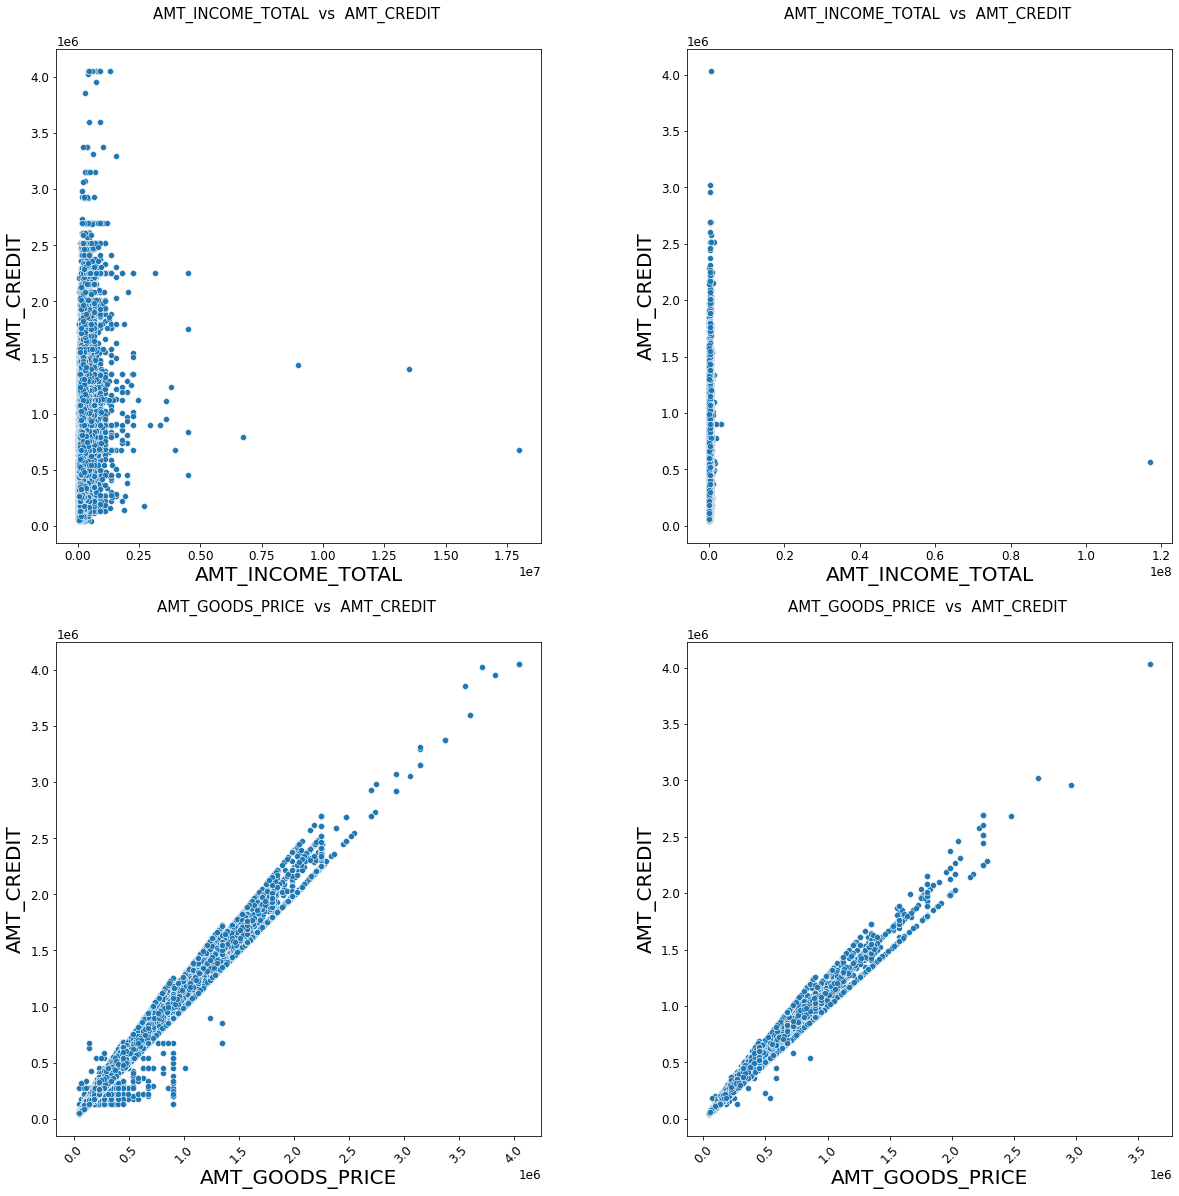

In [59]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT , palette=["g","r"])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT , palette=["g","r"])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT , palette=["g","r"])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT , palette=["g","r"])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.show()



1) Upon observation it can be seen that customers who have paid back the loan with any income level have good credit score compared to customers who did not pay back the loan . 

2) Higher the good price higher the credit amount of loan if and when money is paid back . 

### Numeric variable analysis for Target vs Income Range

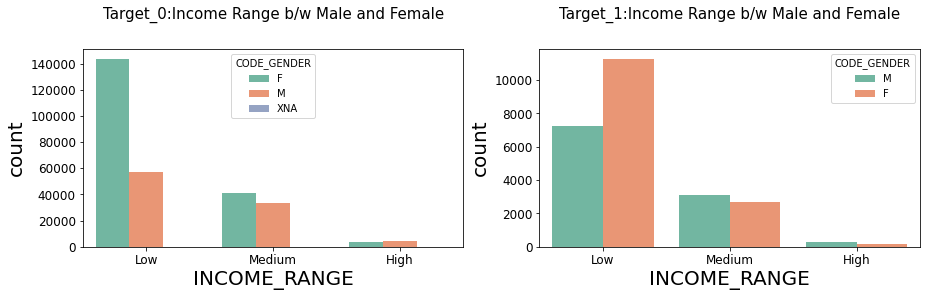

In [60]:

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='Set2')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='Set2' )
plt.show()

It is evidant that Females Low and Medium income range do not have payment difficulty . 

### Box plotting for Credit amount

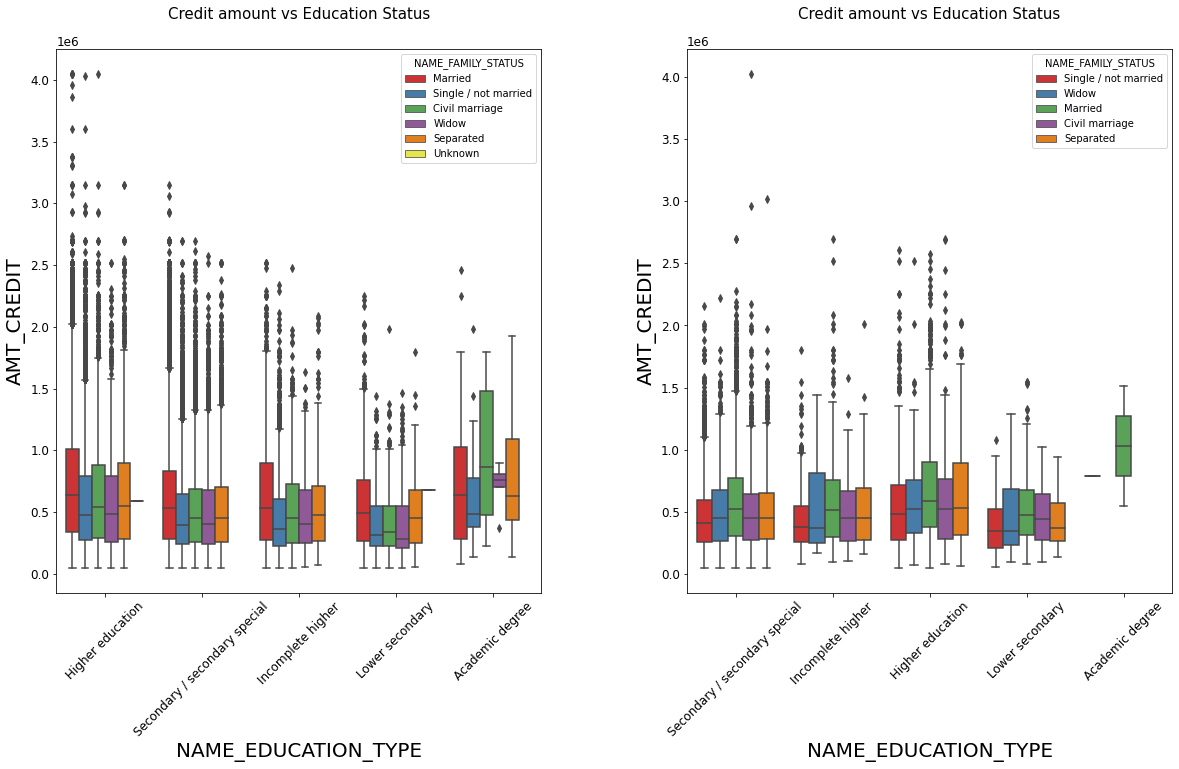

In [61]:

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]' , palette="Set1")
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]' , palette="Set1")
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

1) Married Customers with Higher Education have very high credit compared to customers with any other educational backgrounds . 

2) Widows with Lower Secondary Education have the lowest credit (2nd Quantile) comparatively . 

3) Highly Educated Married Customers have very high chances of paying back the loan without any difficulties . 

### Box plotting for Income amount in logarithmic scale

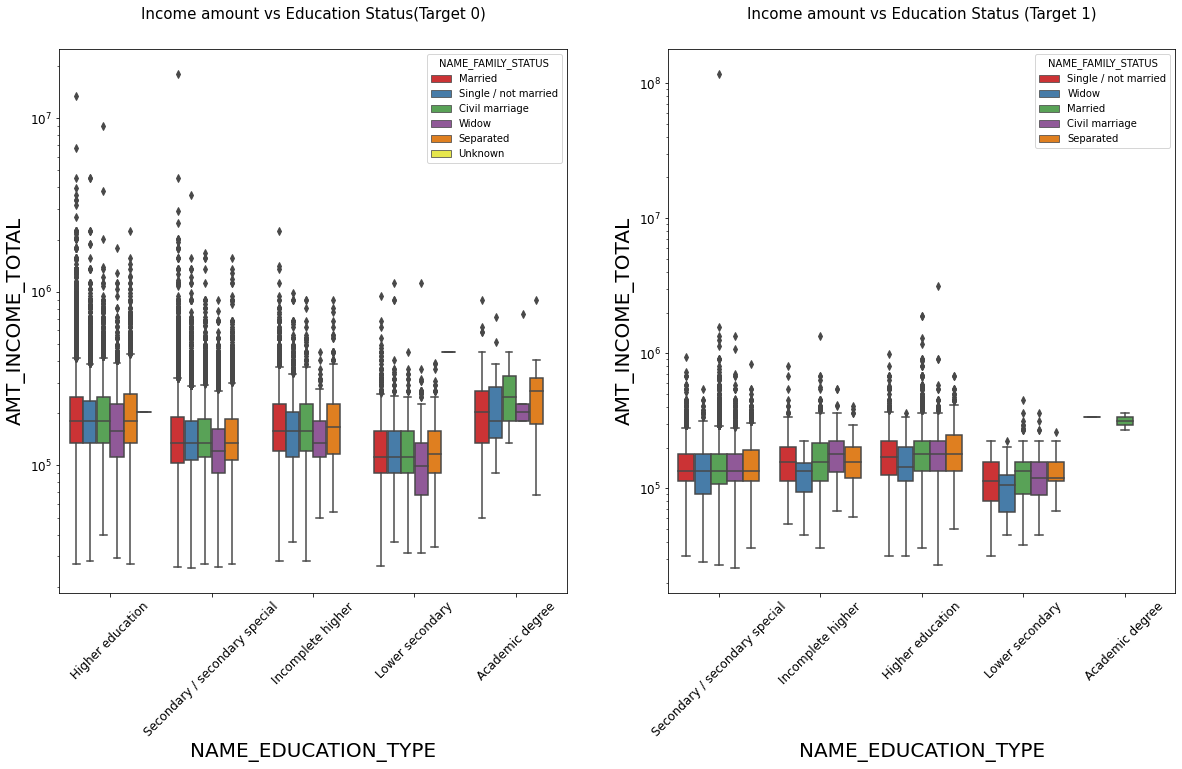

In [62]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette="Set1")
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v' , palette="Set1")
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()


1) Again Highly Educated Married Customers have higher income comparatively 

2) Customers with Higher Education but less imcome have more difficulty paying back the loan

Conclusion :- 1) Upon Analysing we can conclude that customers with good education specially married customers with high education are most likely to payback the loan 

2) We can also conclude that Widows with lower secondary education are most likely to default . 

## Reading Previous Data 

In [63]:
data2 = pd.read_csv("previous_application.csv")

data2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Removing the column values of 'XNA' and 'XAP'

data2=data2.drop(data2[data2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data2=data2.drop(data2[data2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data2=data2.drop(data2[data2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

### Merging the previous application with the current application data file

In [65]:

merged_df= pd.merge(data, data2, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,100034,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,100035,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,100039,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0

In [66]:
new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,100034,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,100035,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,100039,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

## Univariate Analysis 

### Distribution of contract status in logarithmic scale

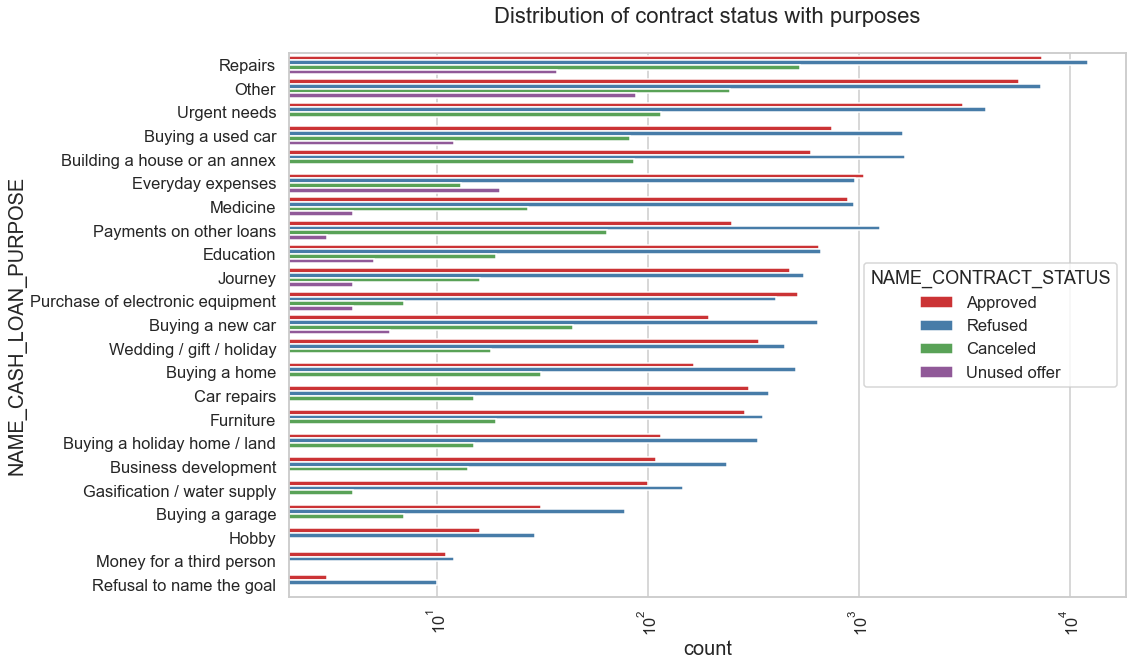

In [67]:

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,10))
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette="Set1")

1) It is evidant that purpose repairs has the maximum loan refusal rate overally . 

2) Loan required for the purpose pf Medicine , Education , Journey , and Everyday Expenses has almost equal approval and rejection rates . 

3) Purposes like Buying car or house or payment of other loan has very high approval rate as compared to their own rejection rate.

### Distribution of contract status with Social Circle

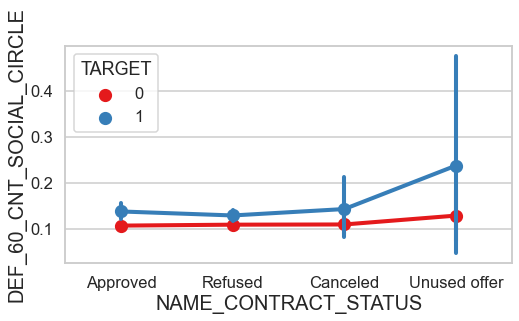

In [68]:

plt.figure(figsize=(8,4))
sns.pointplot(x="NAME_CONTRACT_STATUS", y='DEF_60_CNT_SOCIAL_CIRCLE', hue="TARGET", data=new_df, palette = "Set1")
plt.show()

Customers who has higher average CNT_SOCIAL_CIRCLE score , precisely more than 0.10 has higher chance to default . Hence Customers social surrounding should be taken into consideration.

## Bivariate Analysis  

### Box plotting for Credit amount in logarithmic scale

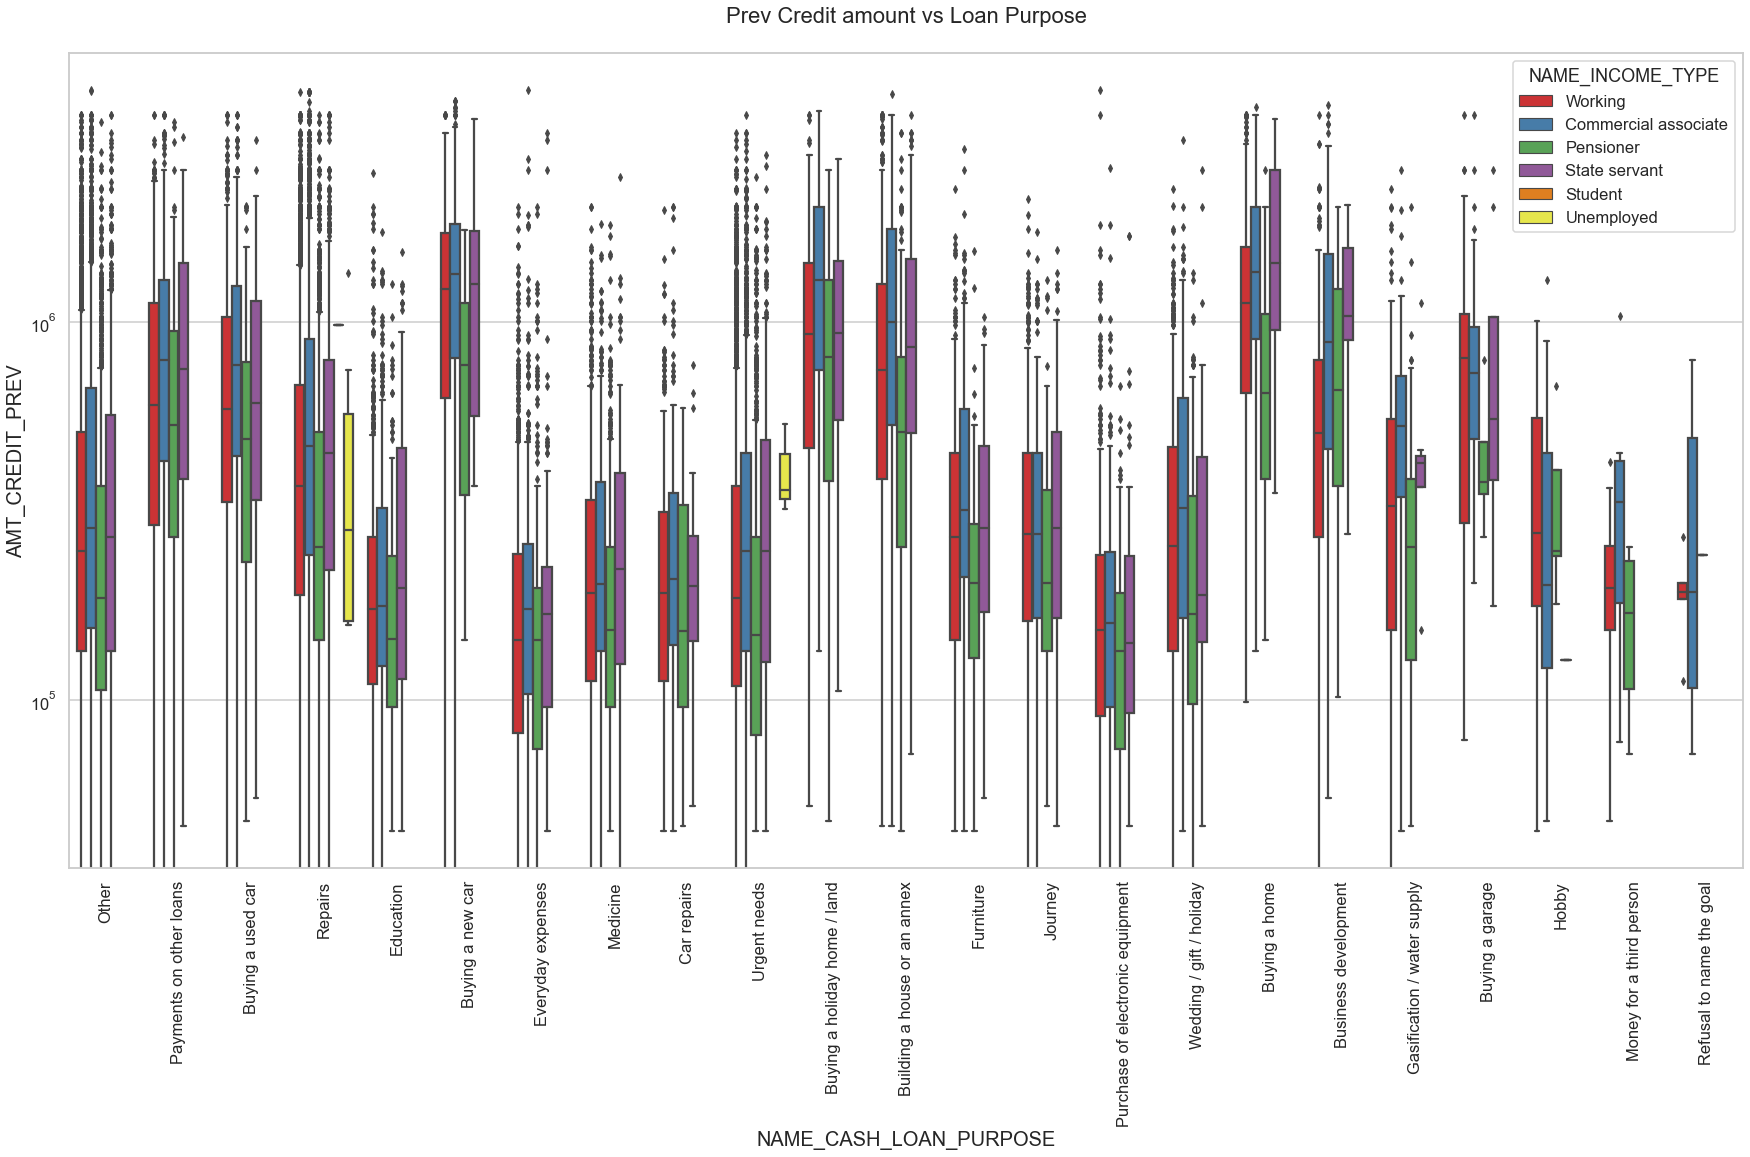

In [69]:

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v' , palette="Set1")
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

### Plotting Credit amount prev vs Housing type 

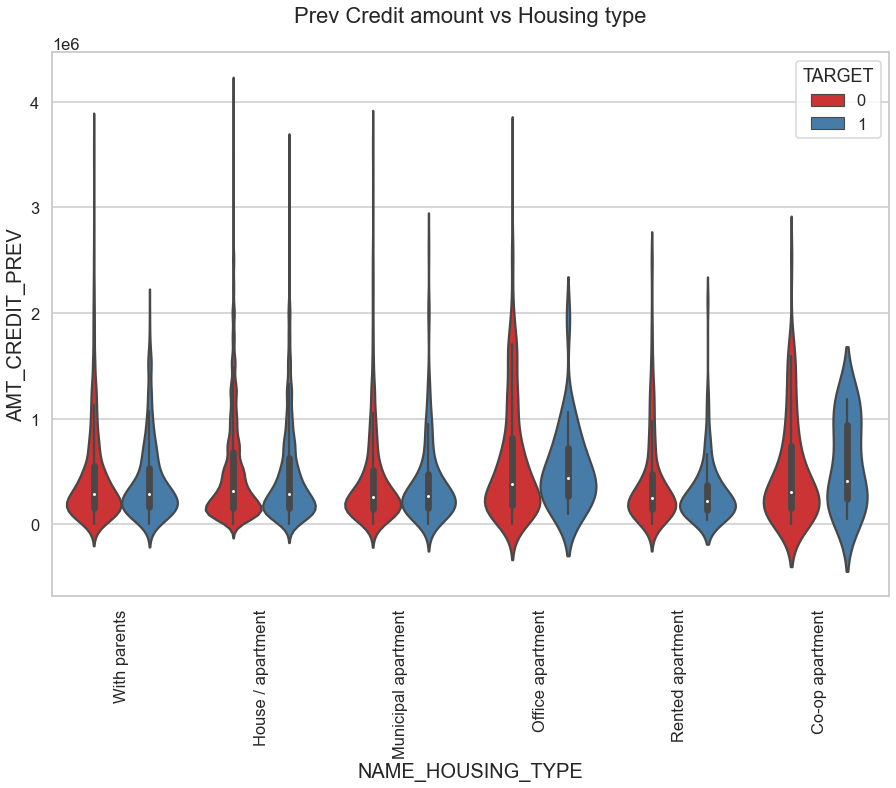

In [70]:

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.violinplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE', palette="Set1")
plt.title('Prev Credit amount vs Housing type')
plt.show()

We can observe that customers from Housing type House apartment has least payment difficulties , and customers from Co-op apartments and Rented Apartments has highest rate of payment difficulties . 

Customers Living with Partents are persuable as they as they have high rate of paying back and low rate of defaulting . 

Conclusion :- Hence customers hailing from Co-op apartments and Rented Apartments are most likely to be defaulters and bank should avoid accepting their loan applications . Banks should mostly focus on customers hailing from Office Apartments or Living With Partents for assured payback of the Loan . 


## Conclusion 


1) Customers like less educated widows , workers living in co-op apartments , or males in general have high chances of defaulting . Hence Bank must avoid approving their loan for assured paybacks .

2) Customers matching above mentioned profile with the loan purpose of Repair , Urgent Need , money for third person and Hobby also have very high chance to default . Hence Bank must avoid approving their loan for assured paybacks . 

3) Banks should rather focus on married couples with higher education or singles with higher education as they have least payment difficulties .

4) Customers like Businessman , Pensioner and Students with housing type House and with Parents should be aggressively pursued as they have least default chances.